In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as st

In [3]:
a = list(csv.reader(open('data.csv','r'),dialect='excel'))
element = [line[0] for line in a[2:12]]
def change(i):
    if i == '' or i == '#NUM!':
        return None
    return float(i)

In [4]:
ogdata = np.array([[change(i) for i in line[1:]] for line in a[2:12]])
data = np.array([[change(i) for i in line[1:]] for line in a[14:24]])
al = np.array([change(i) for i in a[1][1:]])
ele = np.array([42,40,38,34,30,29,28,27,26,22])

Mo & 42 & $0.0058\pm0.0001$ & $-0.9989$\\
Zr & 40 & $0.0078\pm0.0004$ & $-0.9921$\\
Sr & 38 & $0.0123\pm0.0016$ & $-0.9611$\\
Se & 34 & $0.0217\pm0.0002$ & $-0.9998$\\
Zn & 30 & $0.0487\pm0.0006$ & $-0.9997$\\
Cu & 29 & $0.0596\pm0.0007$ & $-0.9997$\\
Co & 27 & $0.0910\pm0.0012$ & $-0.9997$\\
Fe & 26 & $0.1122\pm0.0014$ & $-0.9997$\\


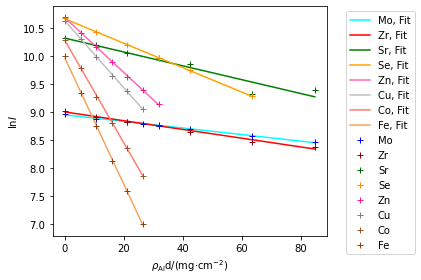

In [5]:
var = {k:[0]*10 for k in ['x','y','f','v','r']}
index = [0,1,2,3,4,5,7,8]

c1=['blue','darkred','darkgreen','darkorange','deeppink','gray','rebeccapurple','sienna','saddlebrown','purple']
c2=['cyan','red','green','orange','hotpink','silver','mediumpurple','salmon','sandybrown','fuchsia']

for i in index:
    x = np.array(al[data[i] != None],dtype='float')
    y = np.array(data[i][data[i] != None],dtype='float')
    f, v = np.polyfit(x,y,1,cov=True)
    _, _, r, _, _, = st.linregress(x,y)
    var['x'][i]=x
    var['y'][i]=y
    var['f'][i]=f
    var['v'][i]=v
    var['r'][i]=r

for i in index:
    func = np.poly1d(var['f'][i])
    plt.plot(var['x'][i],func(var['x'][i]),label=element[i]+', Fit',c=c2[i])

    print(element[i] +' & '+str(ele[i]) + ' & $%.4f\pm%.4f$'%(abs(var['f'][i][0]),np.sqrt(var['v'][i][0,0]) )+' & $%.4f$'%var['r'][i] +'\\\\')

for i in index:
    plt.plot(var['x'][i],var['y'][i],'+',label=element[i],c=c1[i])

plt.xlabel(r'$\rho_{\mathrm{Al}}$d/(mg$\cdot$cm$^{-2}$)')
plt.ylabel('$\ln{I}$')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig('pic/abfit.pdf')

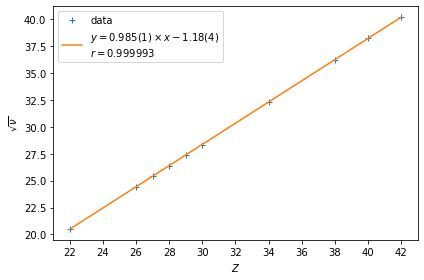

In [6]:

sfq = np.array([40.20696457,38.22499182,36.23685969,32.27413825,28.33848973,27.35781424,26.37953752,25.40157475,24.428467,20.53143931])
fq = np.array([1616.6,1461.15,1313.11,1041.62,803.07,748.45,695.88,645.24,596.75,421.54])
fwhm=np.array([24.4777,20.0408,20.006,17.1304,16.1664,15.7765,15.4025,15.1511,14.9746,13.5747])
# for i in range(len(ele)):
    # print(element[i]+' & '+str(ele[i])+' & '+' %.1f & %.2f \\\\'%(fq[i],fwhm[i]))


ff, vv = np.polyfit(ele,sfq,1,cov=True)
_, _, rr, _, _, = st.linregress(ele,sfq)
plt.plot(ele,sfq,'+',label='data')
plt.plot(ele,np.poly1d(ff)(ele), label=r'$y=%.3f(1)\times x%.2f(4)$'%tuple(ff)+'\n$r=0.999993$')
plt.legend()
x = np.arange(22,44,2)
plt.xticks(x,labels=x)
plt.xlabel('$Z$')
plt.ylabel(r'$\sqrt{\nu}$')
plt.tight_layout()
plt.savefig('pic/msl.pdf')
# print(ff)
# print(np.sqrt(np.abs(vv)))
# print(rr)

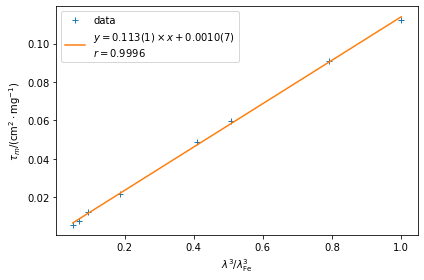

In [7]:
lm3 = (fq[8]/fq)**3
lm3 = [lm3[i] for i in index]
tau = [abs(var['f'][i][0]) for i in index]


para, vari = np.polyfit(lm3,tau,1,cov=True)
_, _, corr, _, _, = st.linregress(lm3,tau)
plt.plot(lm3,tau,'+',label='data')
plt.plot(lm3,np.poly1d(para)(lm3), label=r'$y=%.3f(1)\times x+%.4f(7)$'%tuple(para)+'\n$r=0.9996$')
plt.legend()
plt.xlabel(r'$\lambda^{3}/\lambda_{\mathrm{Fe}}^{3}$')
plt.ylabel(r'$\tau_{m}$/(cm$^{2}\cdot$mg$^{-1}$)')
plt.tight_layout()
plt.savefig('pic/tau.pdf')